# PROBLEM SET-3

In [15]:
# Question-1 (OCCUPATIONS)

# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from this address.
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3. Assign it to a variable called users
users = pd.read_csv(url, sep='|')

# Step 4. Discover what is the mean age per occupation
mean_age_per_occ = users.groupby('occupation')['age'].mean()

# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
users['is_male'] = (users['gender'] == 'M')
male_ratio_per_occ = users.groupby('occupation')['is_male'].mean().sort_values(ascending=False)

# Step 6. For each occupation, calculate the minimum and maximum ages
min_max_age_per_occ = users.groupby('occupation')['age'].agg(['min', 'max'])

# Step 7. For each combination of occupation and sex, calculate the mean age
mean_age_per_combo = users.groupby(['occupation', 'gender'])['age'].mean()


# Step 8. For each occupation present the percentage of women and men
gender_percent_per_occ = users.groupby(['occupation', 'gender'])['is_male'].count() / users.groupby('occupation')['is_male'].count() * 100
print("Mean age per occupation:\n", mean_age_per_occ)
print("\nMale ratio per occupation (most to least):\n", male_ratio_per_occ)
print("\nMinimum and maximum ages per occupation:\n", min_max_age_per_occ)
print("\nMean age per combination of occupation and sex:\n", mean_age_per_combo)
print("\nPercentage of women and men per occupation:\n", gender_percent_per_occ)

Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (most to least):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
ot

In [17]:
#Question-2 (EURO TEAMS)

# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from this address
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv(url)

# Step 4. Select only the Goal column
goals = euro12['Goals']

# Step 5. How many team participated in the Euro2012?
number_of_teams = euro12['Team'].nunique()

# Step 6. What is the number of columns in the dataset?
number_of_columns = euro12.shape[1]

# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign themto a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

# Step 9. Calculate the mean Yellow Cards given per Team
mean_yellow_cards_per_team = euro12['Yellow Cards'].mean()

# Step 10. Filter teams that scored more than 6 goalsStep 
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]

# Step 11. Select the teams that startwith G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Step 12. Select the first 7 columns
first_seven_columns = euro12.iloc[:, :7]

# Step 13. Select all columns except the last 3
all_columns_except_last_three = euro12.iloc[:, :-3]

# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print("Number of teams participated:", number_of_teams)
print("Number of columns:", number_of_columns)
print("Mean Yellow Cards per Team:", mean_yellow_cards_per_team)
print("Teams with more than 6 goals:\n", teams_more_than_6_goals)
print("Teams starting with 'G':\n", teams_starting_with_G)
print("First 7 columns:\n", first_seven_columns)
print("All columns except the last 3:\n", all_columns_except_last_three)
print("Shooting Accuracy for England, Italy, and Russia:\n", shooting_accuracy)

Number of teams participated: 16
Number of columns: 35
Mean Yellow Cards per Team: 7.4375
Teams with more than 6 goals:
        Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19

In [18]:
#Question-3 (HOUSING)

# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000
series_1 = pd.Series(np.random.randint(1, 5, size=100))
series_2 = pd.Series(np.random.randint(1, 4, size=100))
series_3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3. Create a DataFrame by joinning the Series by column
data = {'bedrs': series_1, 'bathrs': series_2, 'price_sqr_meter': series_3}
df = pd.DataFrame(data)

# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5. Create a one column DataFrame with the values of the 3 Series and assign itto 'bigcolumn'
bigcolumn = pd.DataFrame(pd.concat([series_1, series_2, series_3], axis=0))

# Step 6. Ops it seems it is going only until index 99. Is it true?
print("Is it true that 'bigcolumn' goes only until index 99:", bigcolumn.index.max() == 99)

# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn.index = range(300)
print(bigcolumn)


Is it true that 'bigcolumn' goes only until index 99: True
         0
0        2
1        3
2        3
3        4
4        1
..     ...
295  18606
296  21269
297  12503
298  24485
299  16600

[300 rows x 1 columns]


In [25]:
#Question-4 (WIND STATISTICS)

# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from the attached file wind.txt
data = pd.read_csv('wind.txt', delim_whitespace=True)

# Step 3. Create a proper datetime index
data['Date'] = pd.to_datetime(data['Dy'].astype(str) + '/' + data['Mo'].astype(str) + '/' + data['Yr'].astype(str), format='%d/%m/%y')
data.set_index('Date', inplace=True)
data.drop(['Dy', 'Mo', 'Yr'], axis=1, inplace=True)

# Step 4. Fix the year function
def fix_year(year):
    if year > 2000:
        return year - 100
    return year

data.index = data.index.to_series().apply(lambda x: x.replace(year=fix_year(x.year)))


# Step 5. Set the right dates as the index
data.index = pd.to_datetime(data.index)
data.index.name = 'Date'

# Step 6. Count missing values per location
missing_per_location = data.isnull().sum()

# Step 7. Count non-missing values in total
non_missing_total = data.notnull().sum().sum()

# Step 8. Calculate the mean windspeeds over all locations and times
mean_windspeed = data.mean().mean()

# Step 9. Calculate min, max, mean, and standard deviation per location
loc_stats = data.describe()

# Step 10. Calculate min, max, mean, and standard deviation per day
day_stats = data.resample('D').agg(['min', 'max', 'mean', 'std'])

# Step 11. Calculate average windspeed in January for each location
january_data = data.resample('M').mean()  # Resample to monthly frequency
january_data = january_data[january_data.index.month == 1]  # Filter January data
january_avg = january_data.groupby(january_data.index.year).mean()

# Step 12. Downsample to yearly frequency
yearly_data = data.resample('Y').mean()

# Step 13. Downsample to monthly frequency
monthly_data = data.resample('M').mean()

# Step 14. Downsample to weekly frequency
weekly_data = data.resample('W').mean()

# Step 15. Calculate min, max, mean, and standard deviation for each week (first 52 weeks)
weekly_stats = weekly_data.iloc[1:53].describe()

# Print the results
print("Missing values per location:\n", missing_per_location)
print("Total non-missing values:", non_missing_total)
print("Mean windspeeds over all locations and times:", mean_windspeed)
print("Location statistics:\n", loc_stats)
print("Day statistics:\n", day_stats)
print("Average windspeed in January:\n", january_avg)
print("Yearly downsampled data:\n", yearly_data)
print("Monthly downsampled data:\n", monthly_data)
print("Weekly downsampled data:\n", weekly_data)
print("Weekly statistics for the first 52 weeks:\n", weekly_stats)




Missing values per location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
Total non-missing values: 78857
Mean windspeeds over all locations and times: 10.227982360836938
Location statistics:
                RPT          VAL          ROS          KIL          SHA  \
count  6568.000000  6571.000000  6572.000000  6569.000000  6572.000000   
mean     12.362987    10.644314    11.660526     6.306468    10.455834   
std       5.618413     5.267356     5.008450     3.605811     4.936125   
min       0.670000     0.210000     1.500000     0.000000     0.130000   
25%       8.120000     6.670000     8.000000     3.580000     6.750000   
50%      11.710000    10.170000    10.920000     5.750000     9.960000   
75%      15.920000    14.040000    14.670000     8.420000    13.540000   
max      35.800000    33.370000    33.840000    28.460000    37.540000   

               BIR          DUB          CLA          MUL      

In [27]:
#Question-5 (CHIPOTLE DATASET)

# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from the provided address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv(url, sep='\t')

# Step 4. See the first 10 entries
print(chipo.head(10))

# Step 5.What is the number of observations in the dataset?
num_observations = chipo.shape[0]

# Step 6. What is the number of columns in the dataset?
num_columns = chipo.shape[1]

# Step 7. Print the name of all columns
print(chipo.columns)

# Step 8. How the dataset is indexed
print(chipo.index)

# Step 9. Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()

# Step 10.  For the most-ordered item, how many items were ordered?
most_ordered_item_count = chipo['item_name'].value_counts().max()

# Step 11. What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()

# Step 12. How many items were orderd in total?
total_ordered_items = chipo['quantity'].sum()

# Step 13. Convert item price to a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo['item_price'] * chipo['quantity']).sum()

# Step 15. How many orders were made in the period?
num_orders = chipo['order_id'].nunique()

# Step 16. What is the average revenue amount per order?
average_revenue_per_order = revenue / num_orders

# Step 17. How many different items are sold?
num_different_items = chipo['item_name'].nunique()

print("Number of observations:", num_observations)
print("Number of columns:", num_columns)
print("Most-ordered item:", most_ordered_item)
print("Number of the most-ordered item:", most_ordered_item_count)
print("Most ordered choice in choice_description:", most_ordered_choice)
print("Total ordered items:", total_ordered_items)
print("Revenue for the period:", revenue)
print("Number of orders:", num_orders)
print("Average revenue per order:", average_revenue_per_order)
print("Number of different items sold:", num_different_items)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

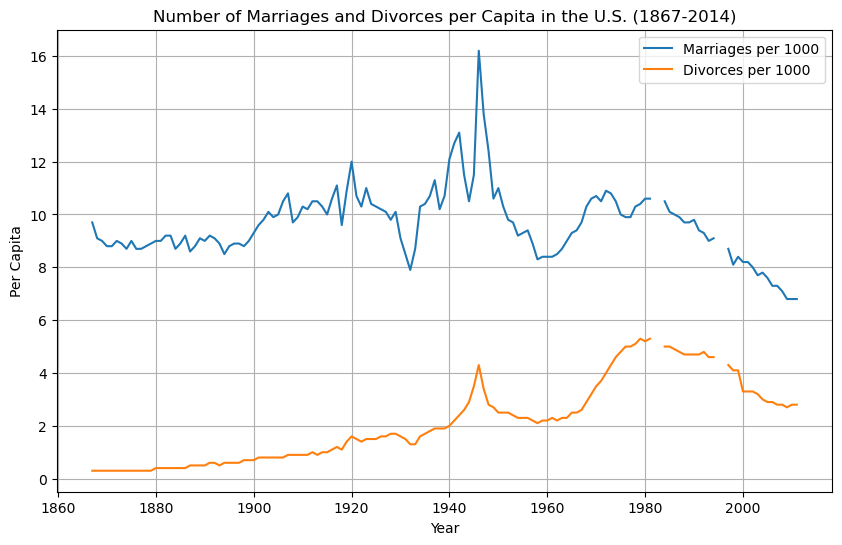

In [30]:
#Question-6
#Create a line plot showing the number of marriages and divorces per capita in theU.S. between 1867 and 2014. Label both lines and show the legend.
# Don't forget to label your axes!

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000')
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()
plt.grid(True)
plt.show()


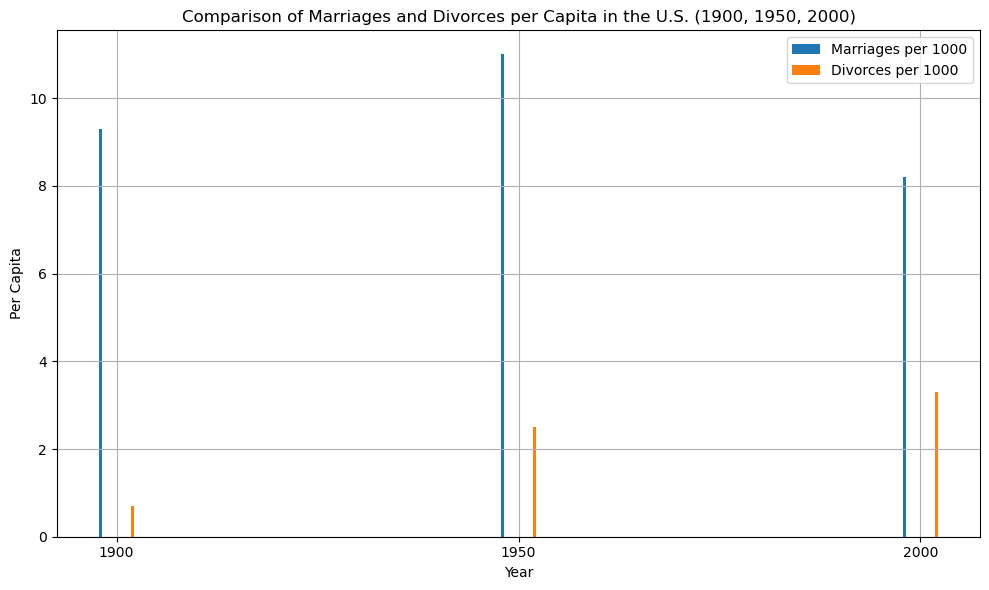

In [31]:
#Question-7

#Create a vertical bar chart comparing the number of marriages and divorces percapita in the U.S. between 1900, 1950, and 2000.
# Don't forget to label your axes!

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]
plt.figure(figsize=(10, 6))
plt.bar(filtered_data['Year'] - 2, filtered_data['Marriages_per_1000'], width=0.4, label='Marriages per 1000')
plt.bar(filtered_data['Year'] + 2, filtered_data['Divorces_per_1000'], width=0.4, label='Divorces per 1000')
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


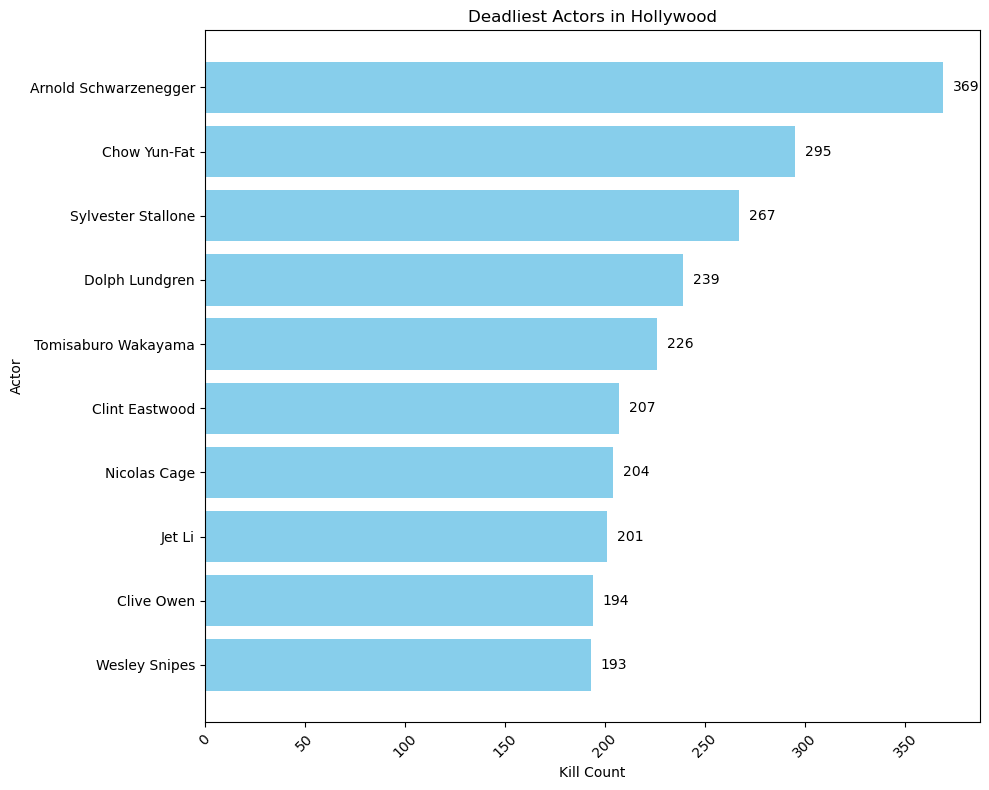

In [32]:
#Question-8

#Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sortthe actors by their kill count and label each bar with the corresponding actor's name.
# Don't forget to label your axes!

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('actor_kill_counts.csv')
sorted_data = data.sort_values(by='Count', ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.xticks(rotation=45)
plt.tight_layout()
for index, value in enumerate(sorted_data['Count']):
    plt.text(value + 5, index, str(value), va='center', color='black')
plt.show()


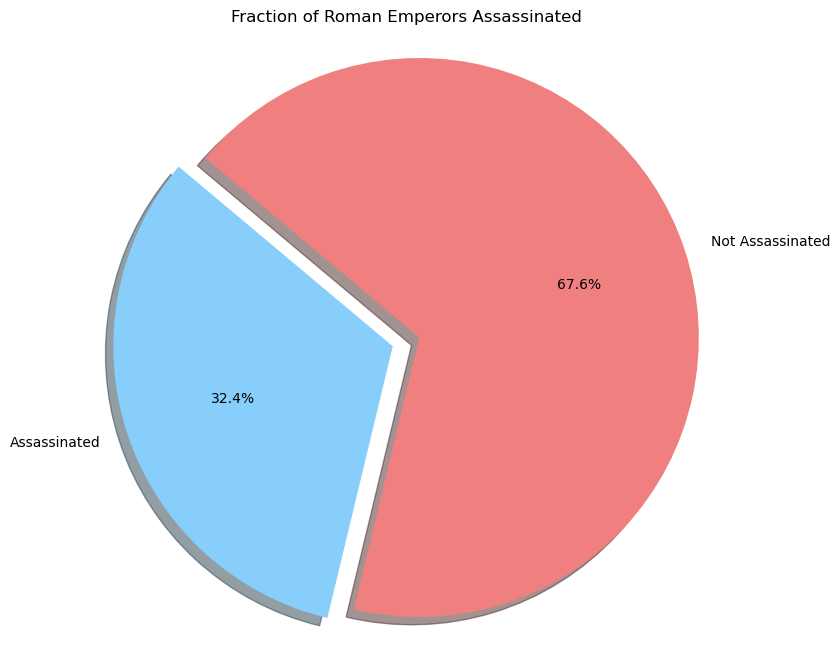

In [35]:
#Question-9

#Create a pie chart showing the fraction of all Roman Emperors that wereassassinated.
# Make sure that the pie chart is an even circle, labels the categories, and shows thepercentage breakdown of the categories.

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]
total_emperors = data.shape[0]
not_assassinated_emperors = total_emperors - assassinated_emperors
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_emperors, not_assassinated_emperors]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice (Assassinated)
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fraction of Roman Emperors Assassinated')
plt.show()



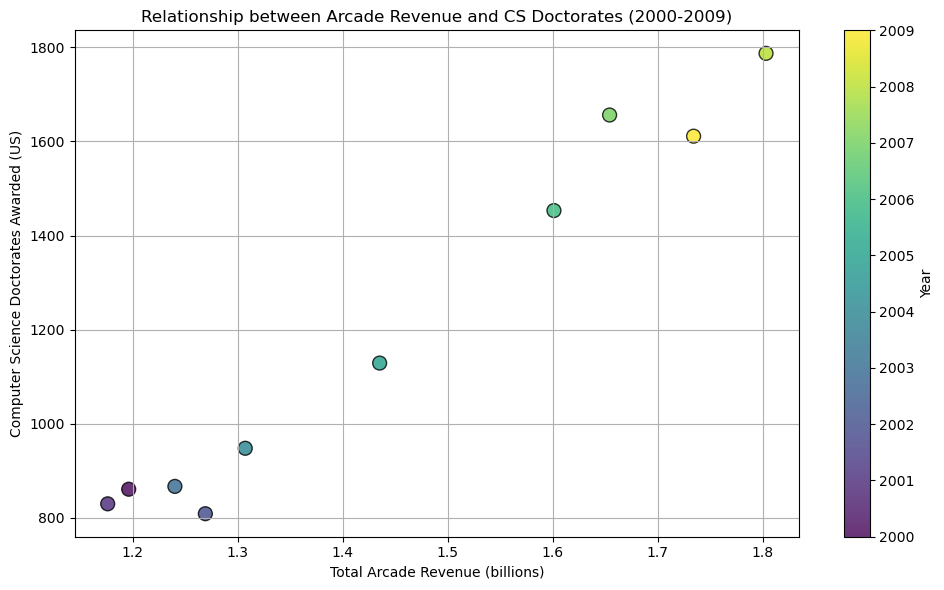

In [34]:
#Question-10

# Create a scatter plot showing the relationship between the total revenue earned byarcades and the number of Computer Science PhDs awarded in the U.S. between2000 and 2009.
# Don't forget to label your axes!
# Color each dot according to its year.

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], c=data['Year'], cmap='viridis', s=100, edgecolors='black', alpha=0.8)
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
plt.colorbar(label='Year')
plt.grid(True)
plt.tight_layout()
plt.show()
